In [69]:
import numpy as npy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

In [51]:
dataframe=pd.read_csv("lab8spamHam.csv")
print(dataframe)
# 1 is spam and 0 is ham

                                                    sms  label
0     Go until jurong point, crazy.. Available only ...      0
1                       Ok lar... Joking wif u oni...\n      0
2     Free entry in 2 a wkly comp to win FA Cup fina...      1
3     U dun say so early hor... U c already then say...      0
4     Nah I don't think he goes to usf, he lives aro...      0
...                                                 ...    ...
5569  This is the 2nd time we have tried 2 contact u...      1
5570             Will ü b going to esplanade fr home?\n      0
5571  Pity, * was in mood for that. So...any other s...      0
5572  The guy did some bitching but I acted like i'd...      0
5573                       Rofl. Its true to its name\n      0

[5574 rows x 2 columns]


In [53]:
#datapreprocessing
dataframe.head(6)
dataframe.tail(8)
dataframe.sample(8)
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
dataframe.columns

Index(['sms', 'label'], dtype='object')

In [11]:
dataframe.size
dataframe.shape

(5574, 2)

In [13]:
dataframe.isnull().sum()

sms      0
label    0
dtype: int64

In [15]:
dataframe['sms']
dataframe['label']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: label, Length: 5574, dtype: int64

In [32]:
# spam_ham = dataframe['sms'].value_counts()  # Assuming 'data' is your dataframe

# print(f"The ham and spam counts are:\n{spam_ham}")

spam=0
ham=0
for label_Col in dataframe['label']:
    if label_Col==0:
        ham+=1
    else:
        spam+=1
print(spam)
    


747


label
0    4827
1     747
Name: count, dtype: int64


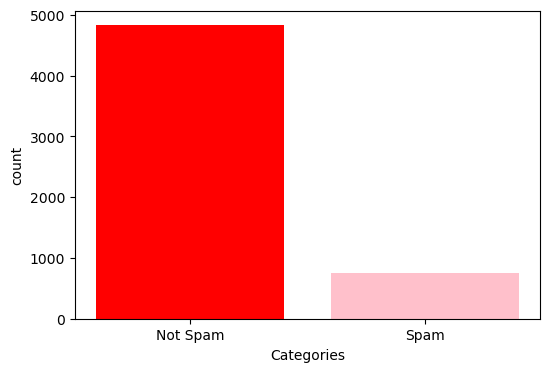

In [17]:
#Data Distribution: Display a bar chart or pie chart illustrating the proportion of
#'Spam' versus 'Not Spam' emails in the dataset. This helps understand the class balance.

spam_counts=dataframe['label'].value_counts()
print(spam_counts)
plot.figure(figsize=(6,4))
plot.bar(spam_counts.index,spam_counts.values,color=['red','pink'])
plot.xlabel("Categories")
plot.ylabel("count")
a=spam_counts.values
#plot.xticks([a[0],a[1]],['not spam','spam'])
plot.xticks([0, 1], ['Not Spam', 'Spam']) 
plot.show()

In [19]:
a=spam_counts.index
print(a[0],a[1])
print(spam_counts.values)
dataframe.sms

0 1
[4827  747]


0       Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...\n
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570               Will ü b going to esplanade fr home?\n
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                         Rofl. Its true to its name\n
Name: sms, Length: 5574, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train,X_test,y_train,y_test=train_test_split(dataframe['sms'],dataframe['label'],test_size=0.23,random_state=34)

In [29]:
#convert the text into matrics using counterVectorizer
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.pipeline import make_pipeline

In [31]:
model=make_pipeline(cv(),MNB(alpha=1)) # laplace smoothing
print(model)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=1))])


In [33]:
model.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=1))])

In [35]:
model.score(X_test,y_test)

0.9875292283710054

In [ ]:
# Confusion Matrix: After training the Naive Bayes model with Laplace smoothing,
# visualize its performance using a confusion matrix. A heatmap  chart
#using Navie Bayes

In [39]:
#metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc

In [41]:
preds=model.predict(X_test)
print(preds)

[0 0 0 ... 0 0 0]


Text(50.722222222222214, 0.5, 'actual values')

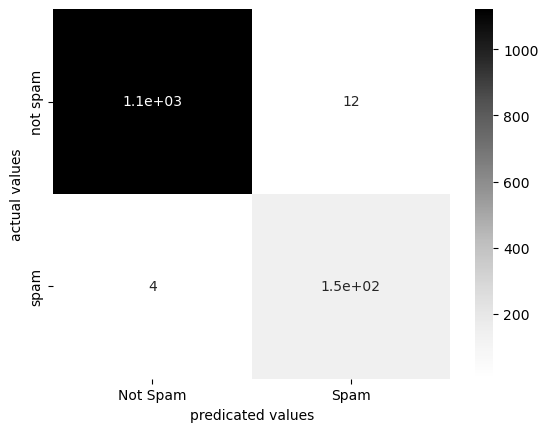

In [43]:
cfm=confusion_matrix(preds,y_test)
#plot the heapmap
#fmt=d help in foormate the decimal
sns.heatmap(cfm,annot=True,xticklabels=['Not Spam', 'Spam'],yticklabels=['not spam','spam'],cmap='Greys')
plot.xlabel("predicated values")
plot.ylabel("actual values")

In [108]:
print(plot.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [ ]:
# ROC Curve: Plot the ROC curve to illustrate the trade-off between the true positive rate
# (sensitivity) and false positive rate (1-specificity) across different thresholds.
# This helps in selecting an appropriate threshold for spam detection.


# if you set a threshold of 0.5, 
#any instance with a probability greater than or equal to 0.5 is classified as positive.

#roc: Receiver Operating Characteristic. 
#It is a graphical representation used to evaluate
#the performance of a binary classification model at various threshold settings.
#Here’s a breakdown of what ROC is and how it works:

In [45]:
y_prob=model.predict_proba(X_test)
print(y_prob)
y_probability=y_prob[:,1]
y_probability

[[1.00000000e+00 9.49179148e-14]
 [1.00000000e+00 5.27168742e-15]
 [9.78786782e-01 2.12132177e-02]
 ...
 [9.98872319e-01 1.12768095e-03]
 [9.99942718e-01 5.72824020e-05]
 [9.98958089e-01 1.04191106e-03]]


array([9.49179148e-14, 5.27168742e-15, 2.12132177e-02, ...,
       1.12768095e-03, 5.72824020e-05, 1.04191106e-03])

In [57]:
#calulating the roc curve
fpr,tpr,threshold=roc_curve(y_test,y_probability)
print("false +ve rate:",fpr)

false +ve rate: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.88888889e-04 8.88888889e-04 1.77777778e-03
 1.77777778e-03 2.66666667e-03 2.66666667e-03 3.55555556e-03
 3.55555556e-03 1.24444444e-02 1.24444444e-02 1.33333333e-02
 1.68888889e-02 2.13333333e-02 2.13333333e-02 4.00000000e-02
 4.17777778e-02 8.00000000e-02 8.35555556e-02 1.37777778e-01
 1.37777778e-01 1.51111111e-01 1.51111111e-01 1.70666667e-01
 1.72444444e-01 1.79555556e-01 1.79555556e-01 2.21333333e-01
 2.24000000e-01 2.41777778e-01 2.43555556e-01 2.47111111e-01
 2.50666667e-01 2.60444444e-01 2.62222222e-01 2.74666667e-01
 2.74666667e-01 2.79111111e-01 2.79111111e-01 3.01333333e-01
 3.03111111e-01 3.38666667e-01 3.38666667e-01 3.43111111e-01
 3.48444444e-01 4.02666667e-01 4.02666667e-01 4.10666667e-01
 4.12444444e-01 4.60444444e-01 4.62222222e-01 4.88888889e-01
 4.90666

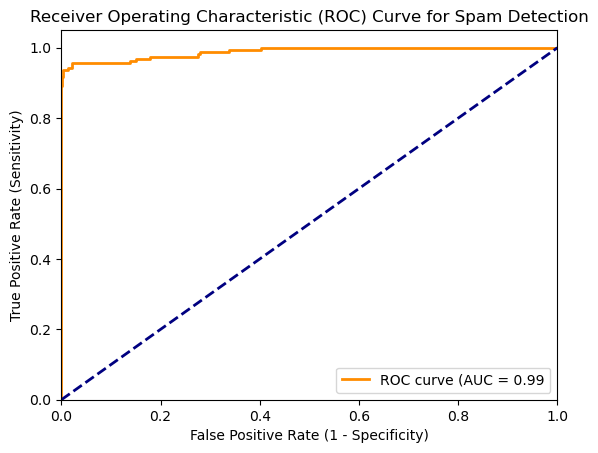

In [61]:
import matplotlib.pyplot as plt
roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})
# Plot using Pandas' plot method
roc_data.plot(x='FPR', y='TPR', kind='line', color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f}', ax=plt.gca())

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier curve

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Spam Detection')
#plt.legend(loc="lower right")
plt.show()

In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

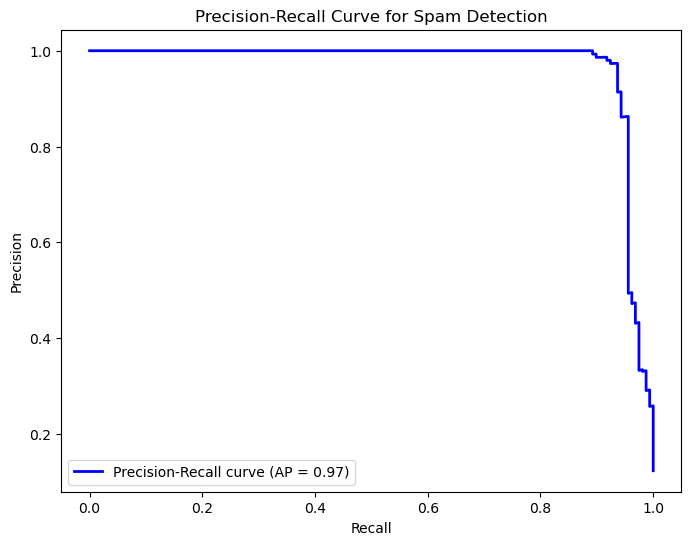

In [65]:
y_prob = model.predict_proba(X_test)[:, 1]  
# Ensure this is a 1D array of probabilities for class 1

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_prob) 
# Use y_prob, not y_probability

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Spam Detection')
plt.legend(loc="lower left")

# Show the plot
plt.show()

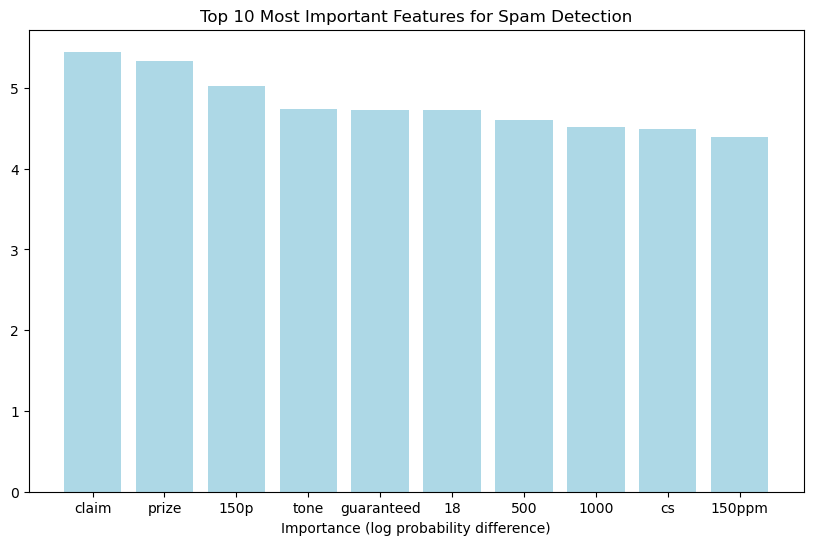

In [77]:
# Access the CountVectorizer step of the pipeline to get the feature names (words)
vectorizer = model.named_steps['countvectorizer']
feature_names = vectorizer.get_feature_names_out()

# Access the MultinomialNB step of the pipeline to get the feature log probabilities
model_1 = model.named_steps['multinomialnb']
log_probabilities = model_1.feature_log_prob_

# Separate the log probabilities for spam and not spam
spam_word_probs = log_probabilities[1]  # Spam class
not_spam_word_probs = log_probabilities[0]  # Not spam class

# Calculate the difference between spam and non-spam probabilities
word_importance = spam_word_probs - not_spam_word_probs

# Create a DataFrame to sort and display the most important features
feature_importance_df = pd.DataFrame({
    'Word': feature_names,
    'Importance': word_importance
})

# Sort by importance (most important words for spam)
top_n = 10  # You can change this value to show more or fewer words
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the top N most important features
plt.figure(figsize=(10, 6))
plt.bar(top_features['Word'], top_features['Importance'], color='lightblue')
plt.xlabel('Importance (log probability difference)')
plt.title(f'Top {top_n} Most Important Features for Spam Detection')
plt.show()

      Metric     Score
0   Accuracy  0.987529
1  Precision  0.973333
2     Recall  0.924051
3   F1 Score  0.948052
4    AUC-ROC  0.988388


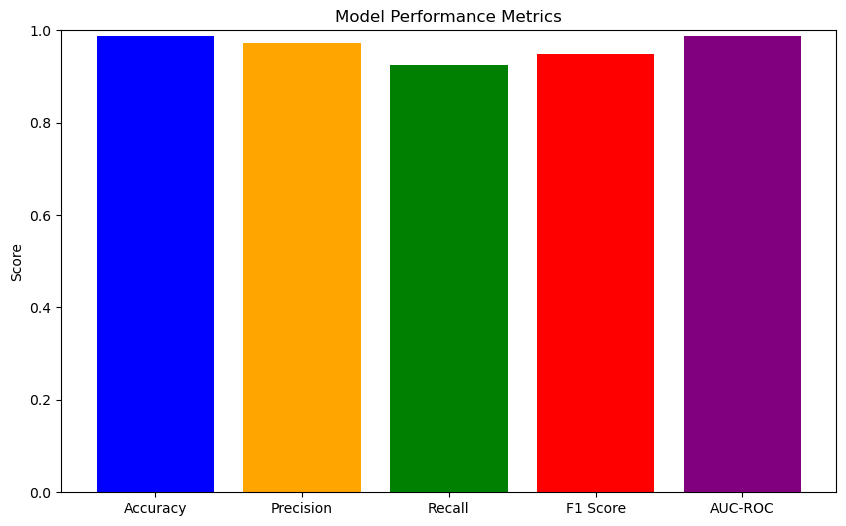

In [172]:
# Calculate metrics
accuracy = accuracy_score(y_test,preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, y_prob)

# Compile metrics into a DataFrame for easier visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display metrics in a table
print(metrics_df)

# Plot metrics as a multi-bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
#plt.grid(axis='y')

# Show the plot
plt.show()

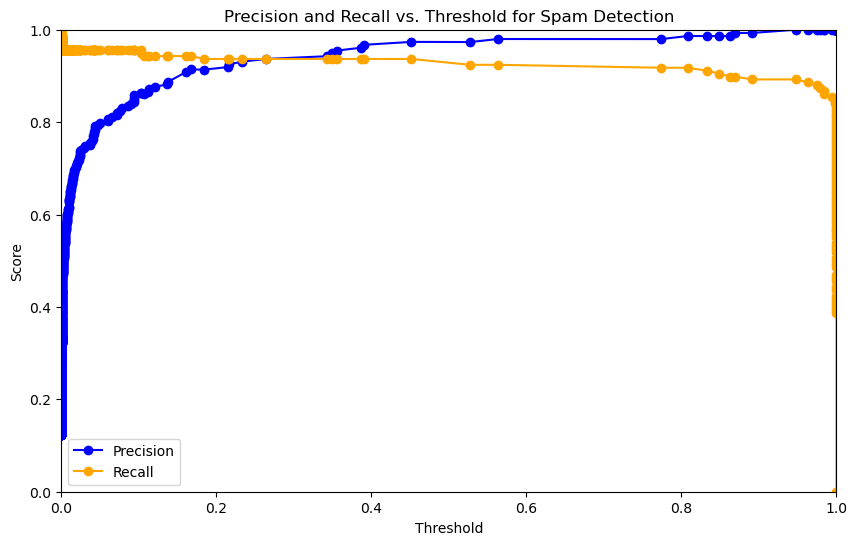

In [71]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Create a DataFrame for easier plotting
thresholds = np.append(thresholds, 1.0)  # Append 1 to the thresholds for proper plotting
precision = np.append(precision, precision[-1])  # Append last precision value
recall = np.append(recall, recall[-1])  # Append last recall value

# Plot precision and recall against thresholds
plt.figure(figsize=(10, 6))

# Plot only for valid thresholds
plt.plot(thresholds, precision[:-1], label='Precision', color='blue', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange', marker='o')  # Avoid last point
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold for Spam Detection')
plt.xlim(0, 1)
plt.ylim(0, 1)
#plt.axhline(0, color='gray', lw=0.5, ls='--')
#plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.legend()
#plt.grid()